Learn to predict the number of real solutions of the tritangent circles to three conics.

In [96]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [97]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
data = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')

In [98]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [99]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=1000, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=136, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              19000     
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 136)               136136    
Total params: 1,156,136
Trainable params: 1,156,136
Non-trainable params: 0
_________________________________________________________________


In [100]:
sce = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='Adam', 
              loss=sce,
              metrics=['accuracy', sce],
              callbacks=[callback])

In [101]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=10,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 - 59s - loss: 2.5391 - accuracy: 0.1621 - sparse_categorical_crossentropy: 2.5391 - val_loss: 2.4133 - val_accuracy: 0.1898 - val_sparse_categorical_crossentropy: 2.4134
Epoch 2/10
80000/80000 - 72s - loss: 2.3569 - accuracy: 0.2090 - sparse_categorical_crossentropy: 2.3569 - val_loss: 2.2186 - val_accuracy: 0.2614 - val_sparse_categorical_crossentropy: 2.2187
Epoch 3/10
80000/80000 - 63s - loss: 2.1340 - accuracy: 0.2893 - sparse_categorical_crossentropy: 2.1340 - val_loss: 1.9067 - val_accuracy: 0.3823 - val_sparse_categorical_crossentropy: 1.9065
Epoch 4/10
80000/80000 - 59s - loss: 1.7981 - accuracy: 0.4144 - sparse_categorical_crossentropy: 1.7981 - val_loss: 1.5174 - val_accuracy: 0.5310 - val_sparse_categorical_crossentropy: 1.5172
Epoch 5/10
80000/80000 - 59s - loss: 1.4014 - accuracy: 0.5609 - sparse_categorical_crossentropy: 1.4014 - val_loss: 1.1064 - val_accuracy: 0.6751 - val_sparse_categorical_crosse

[]

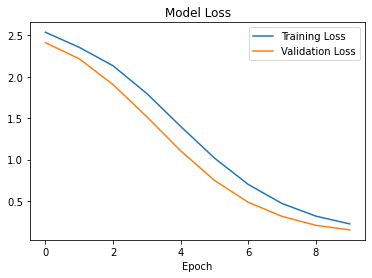

In [102]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

[]

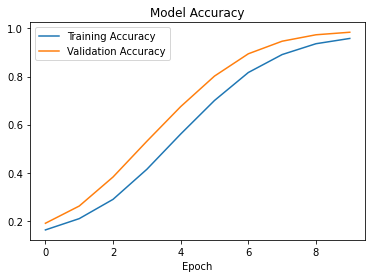

In [103]:
# Graphs
fig = plt.figure()
plt.title('Model Accuracy')
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.plot()

In [109]:
keras.models.save_model(model, "model_1000_1000_136_v3.h5")

In [105]:
# model = keras.models.load_model("/Users/las/Documents/GitHub/REU/model_1000_1000_136_v2.h5", compile=False)

In [107]:
# data = data.drop('prediction', axis=1)
predictions = np.argmax(model.predict(param), axis=1)
data.insert(19, 'predictions', predictions)

<AxesSubplot:>

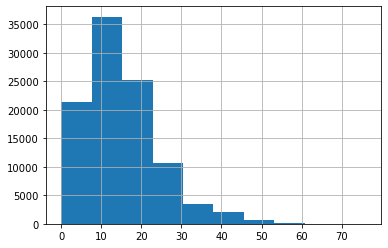

In [ ]:
data.counts.hist()

<AxesSubplot:>

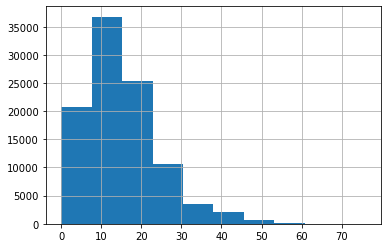

In [ ]:
data.predictions.hist()

In [110]:
max(data.counts)

76